# We will build a Logistic Regression model to predict if a candidate will be called for interview or not using an HR Competency Score Dataset.

## Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

## Dataset

In [2]:
# get the file path of the dataset you have downloaded and put in the path variable
path = "/content/drive/MyDrive/Colab Notebooks/WiDSML_Ghana/HR_Competency_Score_dataset.csv"
hr_data = pd.read_csv(path)

In [3]:
# let us look at a sample of the data
hr_data.head()

,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.333333,0.749498,0.777778,0.7,0.8,0.769231,0.931689,0.662042,0.752463,1
1,0.133333,0.490638,0.777778,0.3,0.4,0.153846,0.352093,0.132231,0.316905,0
2,0.000000,0.460256,0.444444,0.3,0.3,0.051282,0.052347,0.089765,0.254859,0
3,0.000000,0.507347,0.555556,0.4,0.5,0.384615,0.309913,0.289758,0.440784,0
4,0.400000,0.662020,0.666667,0.7,0.5,0.461538,0.497929,0.397544,0.392760,1


## Dataset Description

In [4]:
# Let us see the shape of the data and the columnns and their types 
print(hr_data.shape)
hr_data.info()

(300, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   years_of_experience          300 non-null    float64
 1   functional_competency_score  300 non-null    float64
 2   top1_skills_score            300 non-null    float64
 3   top2_skills_score            300 non-null    float64
 4   top3_skills_score            300 non-null    float64
 5   behavior_competency_score    300 non-null    float64
 6   top1_behavior_skill_score    300 non-null    float64
 7   top2_behavior_skill_score    300 non-null    float64
 8   top3_behavior_skill_score    300 non-null    float64
 9   call_for_interview           300 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 23.6 KB


In [5]:
# let us check if there are any missing values
hr_data.isnull().sum()

years_of_experience            0
functional_competency_score    0
top1_skills_score              0
top2_skills_score              0
top3_skills_score              0
behavior_competency_score      0
top1_behavior_skill_score      0
top2_behavior_skill_score      0
top3_behavior_skill_score      0
call_for_interview             0
dtype: int64

In [6]:
# let us look at some summary statistics
hr_data.describe()

,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,0.231778,0.578350,0.681111,0.510667,0.521667,0.457692,0.480880,0.434732,0.426792,0.530000
std,0.238689,0.156784,0.238006,0.229482,0.230523,0.260942,0.244018,0.225863,0.248246,0.499933
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.480041,0.527778,0.300000,0.300000,0.230769,0.297052,0.249501,0.224828,0.000000
50%,0.200000,0.576121,0.666667,0.500000,0.500000,0.358974,0.433097,0.401338,0.389711,1.000000
75%,0.400000,0.685611,0.888889,0.700000,0.700000,0.666667,0.687145,0.612519,0.632039,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
# let us look at the frequencies of the classes
hr_data['call_for_interview'].value_counts()

1    159
0    141
Name: call_for_interview, dtype: int64

## Exploratory Data Analysis

<Axes: xlabel='years_of_experience', ylabel='Count'>

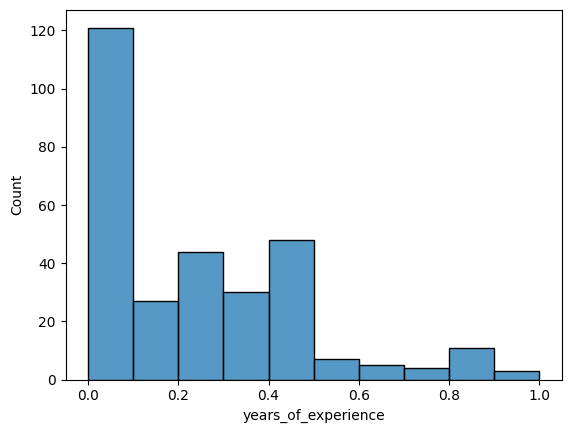

In [8]:
# let us look at the frequency distribution of the years of experience
sns.histplot(data = hr_data, x = 'years_of_experience')

<Axes: xlabel='top1_skills_score', ylabel='Count'>

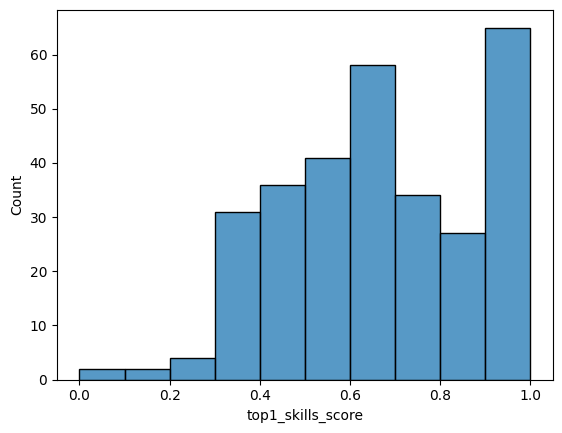

In [9]:
# let us look at the frequency distribution of the top1_skills_score
sns.histplot(data = hr_data, x = 'top1_skills_score')

<Axes: xlabel='behavior_competency_score', ylabel='Count'>

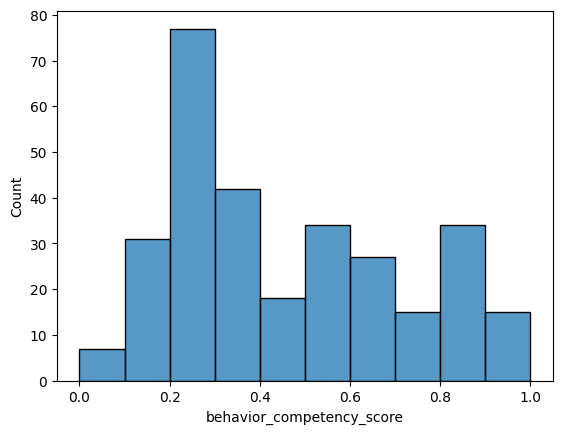

In [10]:
# let us look at the frequency distribution of the behaviour_competency_score
sns.histplot(data = hr_data, x = 'behavior_competency_score')

<Axes: xlabel='functional_competency_score', ylabel='behavior_competency_score'>

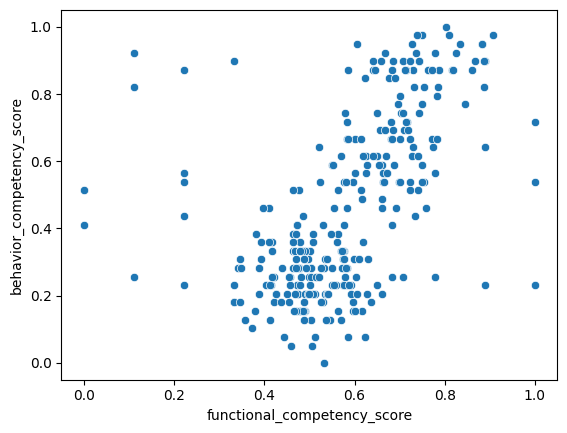

In [11]:
# let us look at the relationship between the functional and the behaviour competency scores
sns.scatterplot(data = hr_data, x = 'functional_competency_score', y = 'behavior_competency_score')

## Extracting the label from the data

In [12]:
y = hr_data['call_for_interview'] # extract the label column from the data
X = hr_data.drop(['call_for_interview'], axis = 1)  # after extracting, let us remove the label column from the dataset

## Train-Test Split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 7, shuffle = True)
print(f" The X training shape is: {X_train.shape} and the Y training shape is {y_train.shape}")
print(f" the test shape is", X_test.shape, f"and the Y test shape is", y_test.shape)

 The X training shape is: (240, 9) and the Y training shape is (240,)
 the test shape is (60, 9) and the Y test shape is (60,)


In [14]:
# the type of the datasets are dataframes or series
type(X_train)

pandas.core.frame.DataFrame

In [15]:
# Converting the dataframes and series to numpy
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [16]:
# now, they are all numpy arrays
print(type(X_train))

<class 'numpy.ndarray'>


## Model Building

## Recaps

1. Logistic/sigmoid function:
\begin{equation}
σ(z)= \dfrac{1}{1+ e^{-z}}
\end{equation}
where  $z= x w$.
2. Derivative of Logistic/sigmoid function with respective to $z$:
\begin{equation}
σ'(z)= σ(z)(1-σ(z))
\end{equation}
3. Negative log likelihood or Cross-entropy loss:
\begin{equation}
l(w)= -\dfrac{1}{N}\sum_{i= 1}^{N} \left(y^{(i)}_{true} \times \log y^{(i)}_{pred} + (1-y^{(i)}_{true}) \times \log (1-y^{(i)}_{pred}) \right)
\end{equation}

where:

 $y_{pred}= σ(z)$, $z= xw$.
4. Derivative of Cross-entropy loss with respective to $w$:
\begin{equation}
\nabla_wl= -\dfrac{1}{N}x^T(y_{true} -y_{pred} )
\end{equation}
5. Apply Batch gradient descent to update $w$.
\begin{equation}
w = w - \alpha \nabla_wl
\end{equation}


In [17]:
class B_LogisticRegression:

  def __init__(self, lr, n_epochs):
    self.lr = lr
    self.n_epochs = n_epochs
    self.train_losses = []   # we use this to gather the loss after every epoch
    self.w = None

  def sigmoid(self, x):
    sig_func = 1 / (1 + np.exp(- (x @ self.w)))  # these will be the predictions, we use the sigmoid function to get the probalities of z = xw
    return sig_func

  def cross_entropy(self, x, y_true):
    y_pred = self.sigmoid(x)
    loss = -np.mean((y_true * np.log(y_pred)) + ((1 - y_true) * np.log(1 - y_pred)),  axis = 0) # computing the loss in point 3 of the recap above
    return loss

  def fit(self,x,y):
    y = y.reshape((-1,1))

    # initialize the weights exclusive of the bias
    self.w = np.zeros((x.shape[1], 1))  

    for epoch in range(self.n_epochs):
      # make predictions
      y_pred = self.sigmoid(x)

      # compute the gradient of the loss as shown in recap no.4
      dl = - (1/x.shape[0]) * (x.T @ (y - y_pred))

      # update rule as shown in recap no.5
      self.w = self.w - self.lr * dl

      #get the loss susing the formula in recap no.3
      loss = self.cross_entropy(x, y)

      self.train_losses.append(loss)   # we append the loss at every epoch

      if epoch%100 == 0:    # we want to see the losses, but not for every epoch, as they are many, so we want to see the loss at every 100th epoch
        print(f'loss for epoch {epoch} is {loss.item()}')


  def predict(self,x):
    proba = self.sigmoid(x)    # we use the sigmoid function to get the prediction probabilities
    output = [0 if p <= 0.5 else 1 for p in proba] # now with a threshold of 0.5, we conclude that those > 0.5 will belong to class 1 and those below or equal to 0.5 will belong to class 0
    return output
   
  def accuracy(self, y_true, y_pred):  # this method helps us to see the accuracy on the test set
    acc = np.mean(y_true == y_pred)*100
    return acc
      

## Testing the Logistic regression we have built ourselves

In [18]:
# Let us create an instance of our class B_LogisticRegression called model_b
model_b = B_LogisticRegression(lr = 0.1, n_epochs = 1000)

In [19]:
# Let us train our Logistic regression on our train data
model_b.fit(X_train, y_train)

loss for epoch 0 is 0.6844460289309803
loss for epoch 100 is 0.5787551661585453
loss for epoch 200 is 0.541770255986696
loss for epoch 300 is 0.5120791472614841
loss for epoch 400 is 0.48790419388704753
loss for epoch 500 is 0.46793761290147784
loss for epoch 600 is 0.451219123906749
loss for epoch 700 is 0.43703986381404386
loss for epoch 800 is 0.42487171866306056
loss for epoch 900 is 0.4143168330656344


In [20]:
# Let us make predictions on our test set
y_pred = model_b.predict(X_test)

In [21]:
# Let us get the accuracy on our test test
accuracy_b = model_b.accuracy(y_test, y_pred)
accuracy_b

83.33333333333334

Kindly note that, one can fine tune the model to improve things. When we used a learning rate of 0.01, we got an accuracy of 46%.
And then, when we change the learning rate to 0.01, we got an accuracy of 83%. 
Learning rate and number of epochs are examples of hyperparamters that you need to tune to improve things.

## Let us now use the built-in Logistic Regression from sckikit-learn (also called sklearn).

In [22]:
# Let us create an instance of LogisticRegression called model
# To have same conditions as our own built-in model, we have exclude bias with "fit_intercept = False", as was done in our model.
model = LogisticRegression(fit_intercept = False)

In [23]:
# Let us train the Logistic regression on our train data
model.fit(X_train, y_train)

LogisticRegression(fit_intercept=False)

In [24]:
# Let us make predictions on our test set
y_p = model.predict(X_test)

In [25]:
# Let us get the accuracy on our test test
accuracy = accuracy_score(y_test, y_p)
accuracy

0.8333333333333334

I hope you can observe that we get the same accuracy with using our own buikt-in model and using sklearn's model. 

* With this, you can see and appreciate how models are developed.

* There are many more exciting and advanced things you can do which we did not cover. 

* However, this should not stop you but encourage you to learn and explore more. I look forward to the exciting things you do further.